In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE
import joblib

In [2]:
mv = pd.read_csv("most-visited-countries-2024.csv")
mv.head()

,country,MostVisited_NumOfArrivalsPredictive_Millions_2024,MostVisited_NumOfArrivals_Millions_2023,MostVisited_NumOfArrivals_Millions_2022,MostVisited_NumOfArrivals_WorldBank,MostVisited_DataYear_WorldBank
0,India,17.9,NaN,NaN,17914000.0,2019.0
1,China,65.7,NaN,NaN,30402000.0,2020.0
2,United States,79.3,66.48,50.87,45037000.0,2020.0
3,Indonesia,15.5,NaN,NaN,4053000.0,2020.0
4,Pakistan,NaN,NaN,NaN,966000.0,2012.0


In [3]:
mv.columns

Index(['country', 'MostVisited_NumOfArrivalsPredictive_Millions_2024',
       'MostVisited_NumOfArrivals_Millions_2023',
       'MostVisited_NumOfArrivals_Millions_2022',
       'MostVisited_NumOfArrivals_WorldBank',
       'MostVisited_DataYear_WorldBank'],
      dtype='object')

In [5]:
mv.shape

(203, 6)

In [6]:
mv.dtypes

country                                               object
MostVisited_NumOfArrivalsPredictive_Millions_2024    float64
MostVisited_NumOfArrivals_Millions_2023              float64
MostVisited_NumOfArrivals_Millions_2022              float64
MostVisited_NumOfArrivals_WorldBank                  float64
MostVisited_DataYear_WorldBank                       float64
dtype: object

In [8]:
mv.isnull().sum()

country                                                0
MostVisited_NumOfArrivalsPredictive_Millions_2024    153
MostVisited_NumOfArrivals_Millions_2023              154
MostVisited_NumOfArrivals_Millions_2022              183
MostVisited_NumOfArrivals_WorldBank                    1
MostVisited_DataYear_WorldBank                         1
dtype: int64

In [18]:
mv["MostVisited_NumOfArrivalsPredictive_Millions_2024"].mode()

0     7.4
1     9.3
2    22.1
Name: MostVisited_NumOfArrivalsPredictive_Millions_2024, dtype: float64

In [19]:
mv["MostVisited_NumOfArrivalsPredictive_Millions_2024"] = mv["MostVisited_NumOfArrivalsPredictive_Millions_2024"].fillna("7.4")

In [22]:
mv["MostVisited_NumOfArrivals_Millions_2023"].mode()

0     4.05
1    28.15
Name: MostVisited_NumOfArrivals_Millions_2023, dtype: float64

In [23]:
mv["MostVisited_NumOfArrivals_Millions_2023"] = mv["MostVisited_NumOfArrivals_Millions_2023"].fillna("4.05")

In [20]:
mv["MostVisited_NumOfArrivals_Millions_2022"].mode()

0     11.66
1     12.65
2     12.70
3     12.82
4     15.32
5     15.95
6     16.07
7     16.65
8     22.25
9     22.65
10    26.21
11    27.84
12    28.46
13    30.74
14    38.33
15    49.81
16    50.45
17    50.87
18    71.66
19    79.40
Name: MostVisited_NumOfArrivals_Millions_2022, dtype: float64

In [21]:
mv["MostVisited_NumOfArrivals_Millions_2022"] = mv["MostVisited_NumOfArrivals_Millions_2022"].fillna("11.66")

In [9]:
# Summary statistics
print(mv.describe())

# Group by country and calculate total arrivals over time
country_totals = mv.groupby('country')[['MostVisited_NumOfArrivalsPredictive_Millions_2024', 'MostVisited_NumOfArrivals_Millions_2023', 'MostVisited_NumOfArrivals_Millions_2022']].sum()
print(country_totals)

       MostVisited_NumOfArrivalsPredictive_Millions_2024  \
count                                          50.000000   
mean                                           24.102000   
std                                            20.915374   
min                                             5.900000   
25%                                             9.750000   
50%                                            16.800000   
75%                                            30.000000   
max                                            89.400000   

       MostVisited_NumOfArrivals_Millions_2023  \
count                                 49.00000   
mean                                  19.22898   
std                                   20.78654   
min                                    3.73000   
25%                                    5.87000   
50%                                   11.03000   
75%                                   26.54000   
max                                  100.00000   

       M

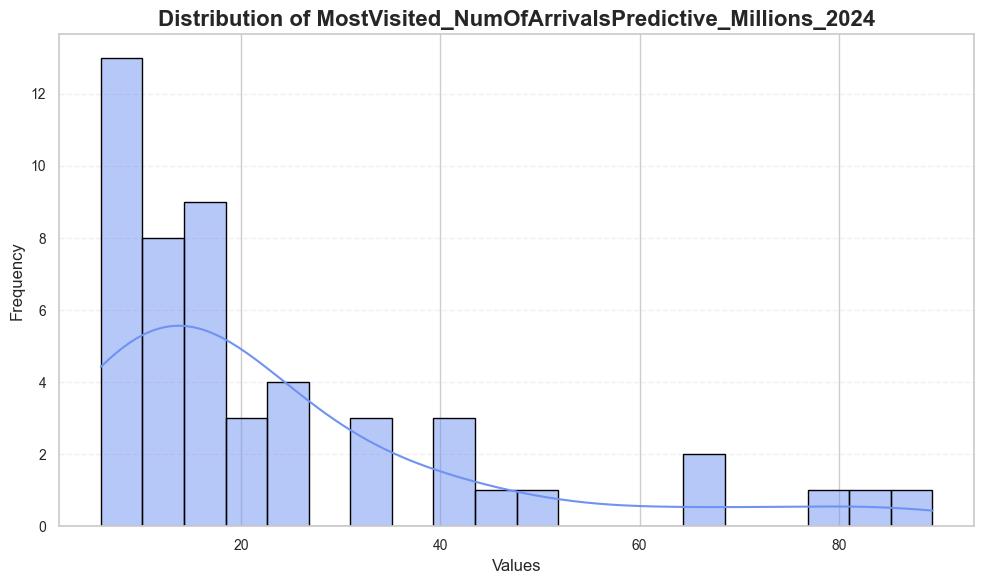

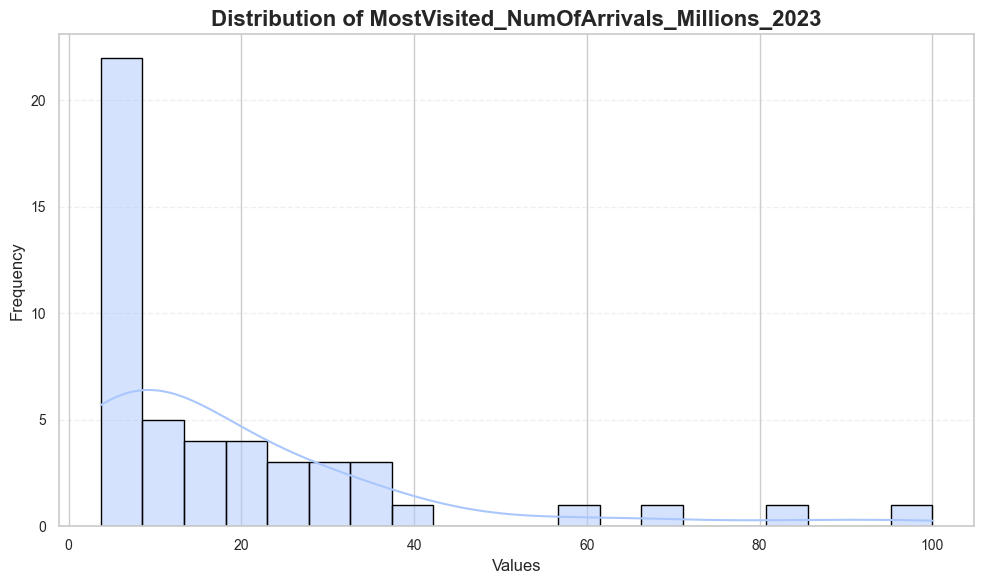

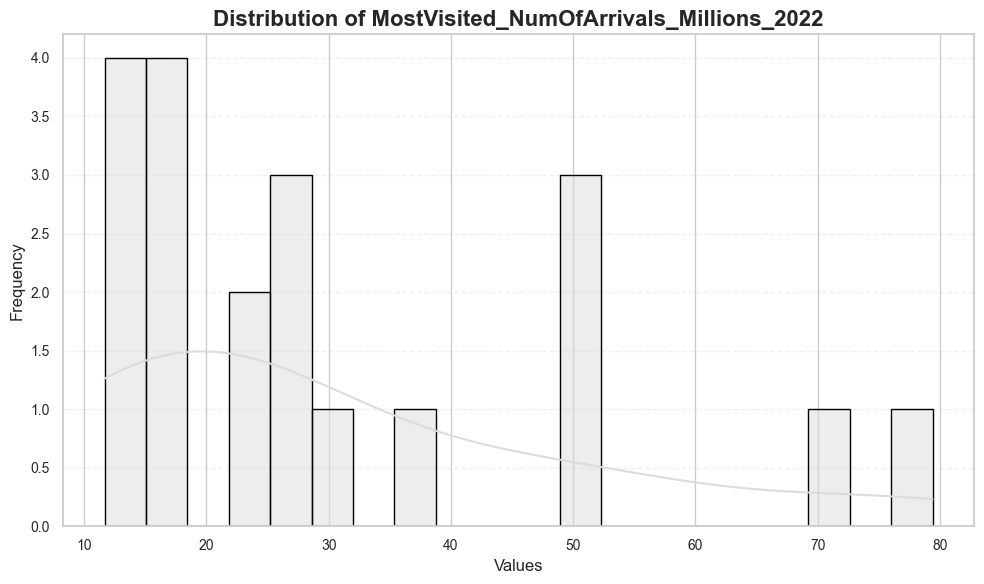

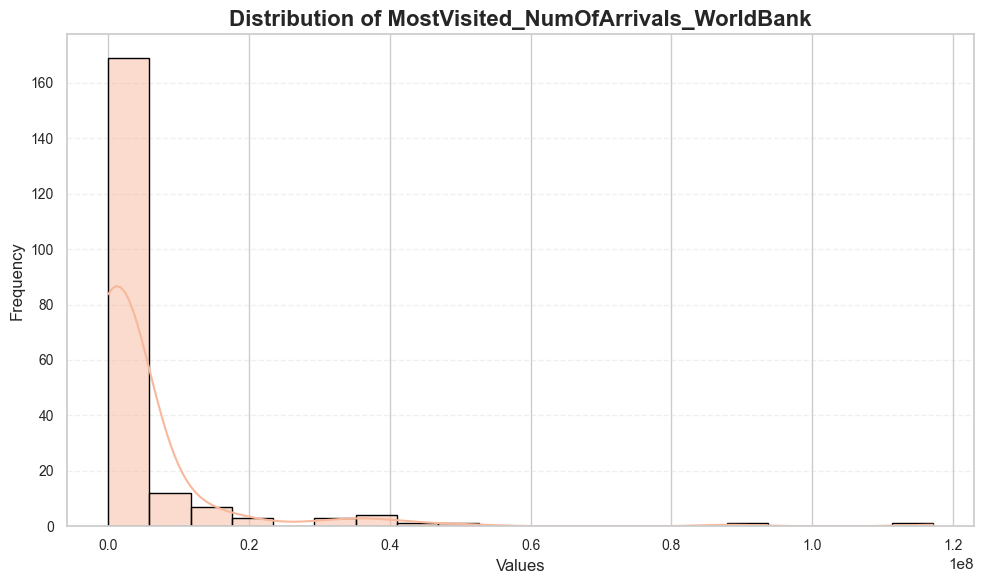

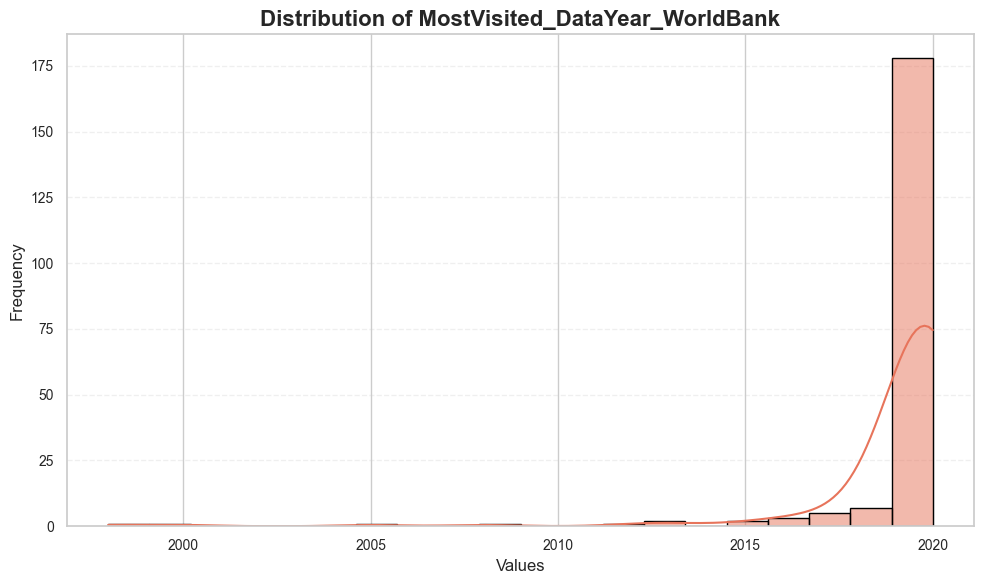

In [16]:
# Apply a modern style to all plots
sns.set_theme(style="whitegrid", palette="muted")

# Columns to analyze
columns_to_analyze = [ 
    'MostVisited_NumOfArrivalsPredictive_Millions_2024', 
    'MostVisited_NumOfArrivals_Millions_2023', 
    'MostVisited_NumOfArrivals_Millions_2022', 
    'MostVisited_NumOfArrivals_WorldBank', 
    'MostVisited_DataYear_WorldBank'
]

# Define a color palette
custom_palette = sns.color_palette("coolwarm", len(columns_to_analyze))

# Loop through each column for univariate analysis
for i, col in enumerate(columns_to_analyze):
    plt.figure(figsize=(10, 6))
    
    # Check the column type for appropriate visualization
    if mv[col].dtype == 'object':  # Categorical data
        sns.countplot(
            data=mv, 
            y=col, 
            palette=custom_palette,
            order=mv[col].value_counts().index
        )
        plt.title(f"Frequency of {col}", fontsize=16, fontweight='bold')
        plt.ylabel("Categories", fontsize=12)
        plt.xlabel("Count", fontsize=12)
    else:  # Numerical data
        sns.histplot(
            mv[col], 
            kde=True, 
            bins=20, 
            color=custom_palette[i % len(custom_palette)],
            edgecolor="black",
            linewidth=1
        )
        plt.title(f"Distribution of {col}", fontsize=16, fontweight='bold')
        plt.xlabel("Values", fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
    
    # Additional aesthetics
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(visible=True, alpha=0.3, linestyle="--", axis="y")
    plt.tight_layout()
    plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19516\4154040147.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='country', y='MostVisited_NumOfArrivalsPredictive_Millions_2024', data=top_10_2024, palette='viridis')


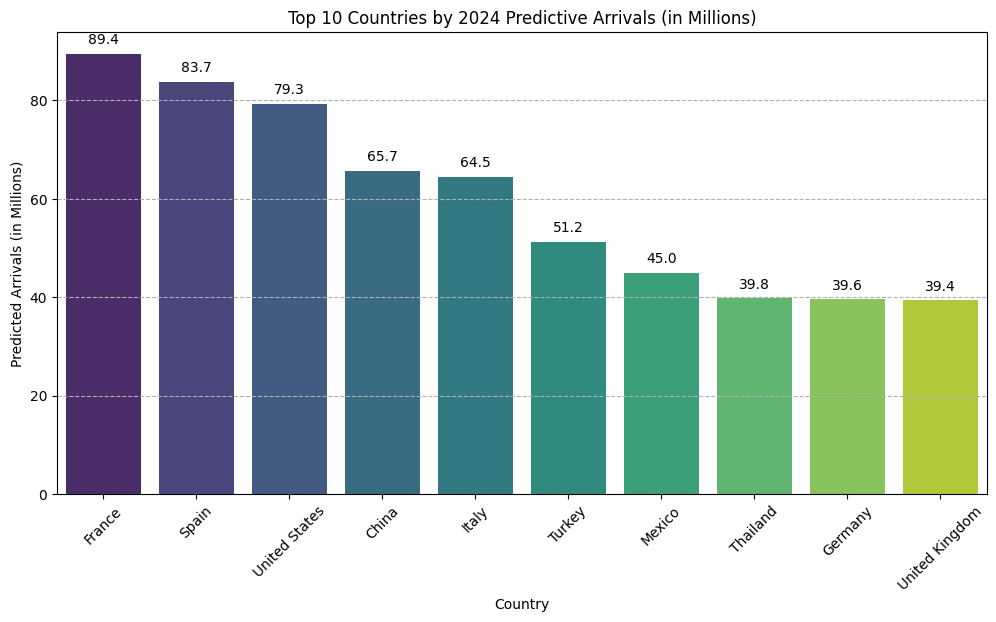

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar chart of top 10 countries by 2024 predictive arrivals
top_10_2024 = mv.nlargest(10, 'MostVisited_NumOfArrivalsPredictive_Millions_2024')

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='country', y='MostVisited_NumOfArrivalsPredictive_Millions_2024', data=top_10_2024, palette='viridis')
plt.title('Top 10 Countries by 2024 Predictive Arrivals (in Millions)')
plt.xlabel('Country')
plt.ylabel('Predicted Arrivals (in Millions)')

# Add data labels
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.show()

In [25]:
mv.columns

Index(['country', 'MostVisited_NumOfArrivalsPredictive_Millions_2024',
       'MostVisited_NumOfArrivals_Millions_2023',
       'MostVisited_NumOfArrivals_Millions_2022',
       'MostVisited_NumOfArrivals_WorldBank',
       'MostVisited_DataYear_WorldBank'],
      dtype='object')

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\3217708609.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


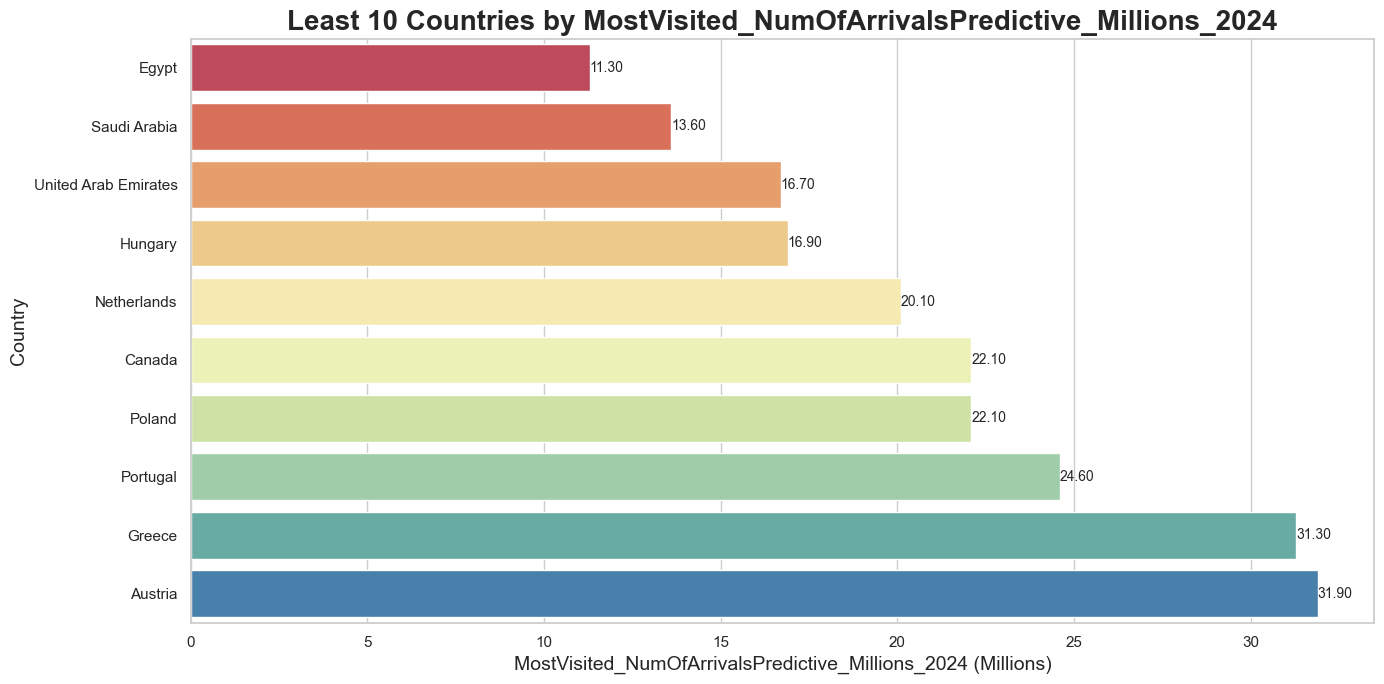

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\3217708609.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


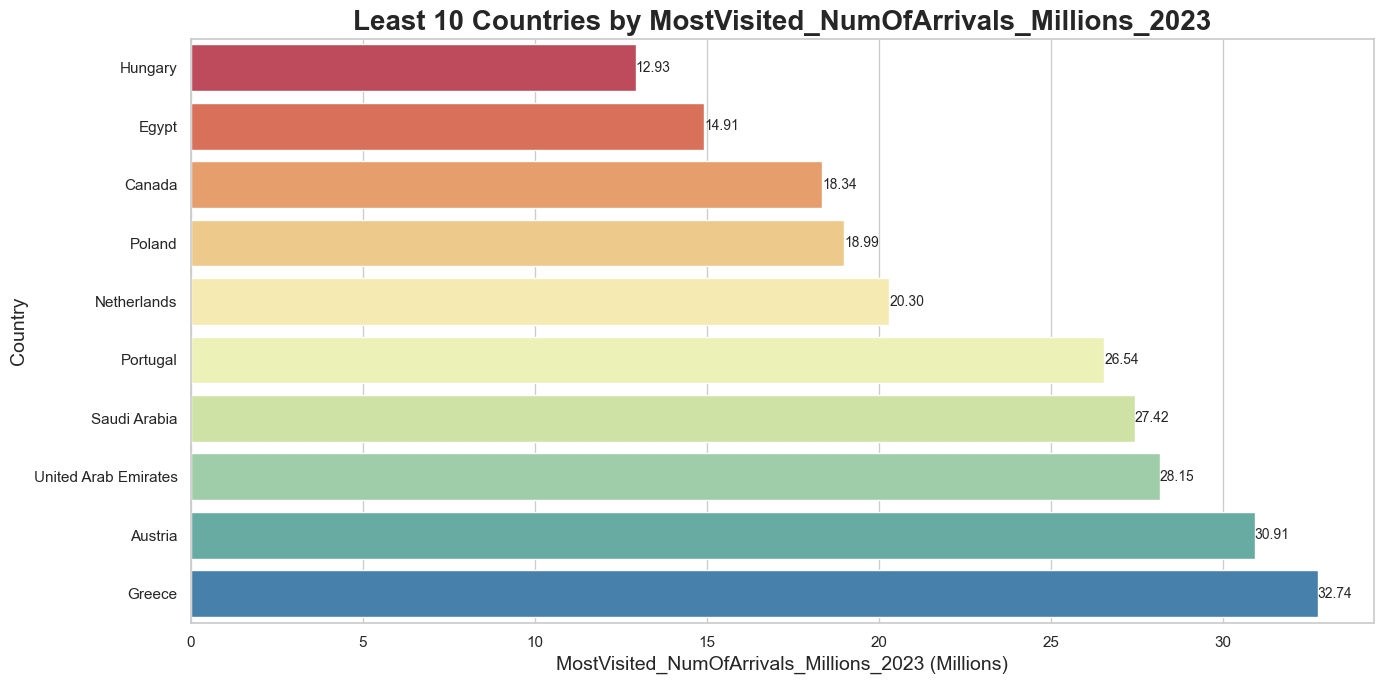

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\3217708609.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


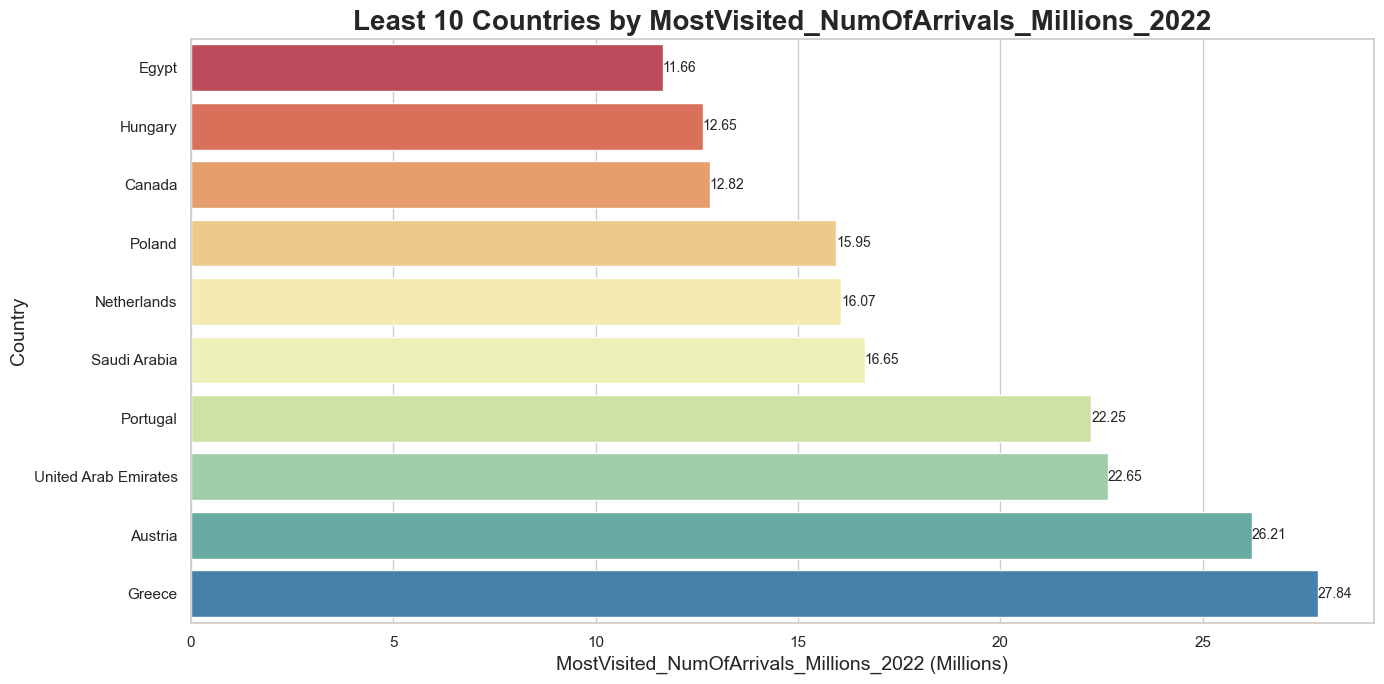

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\3217708609.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


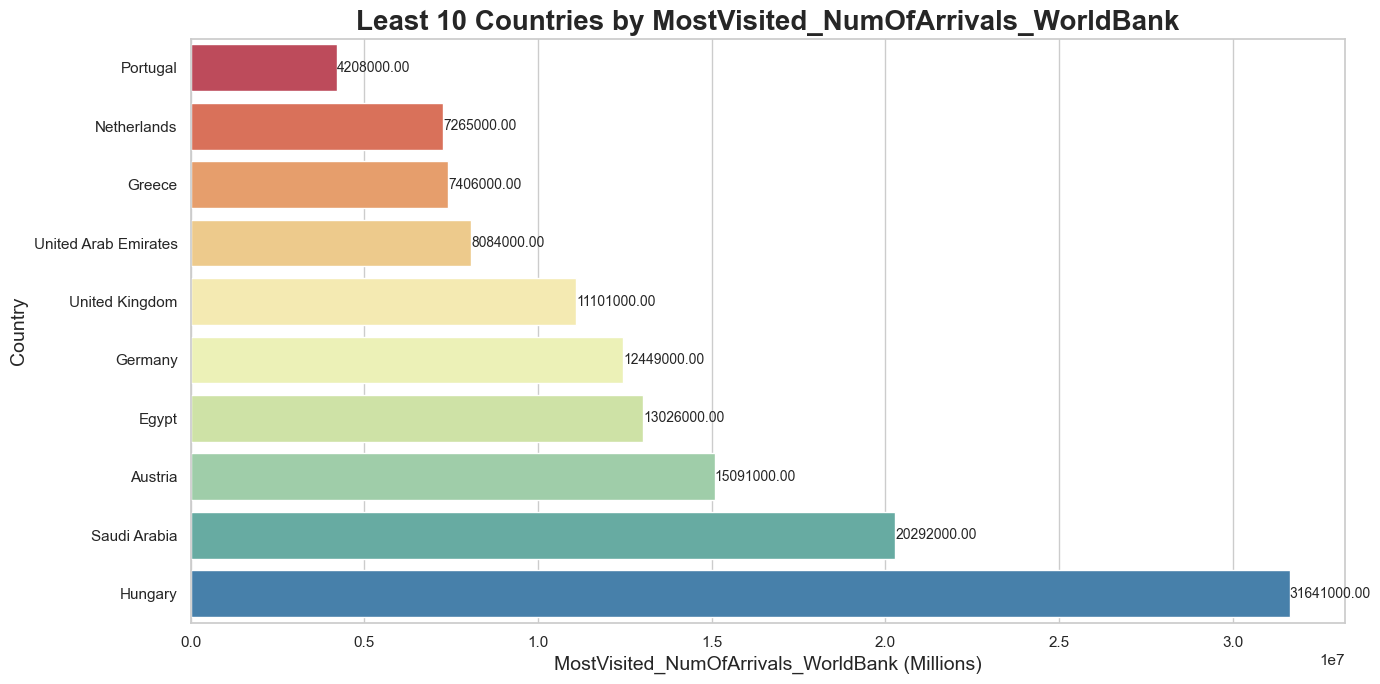

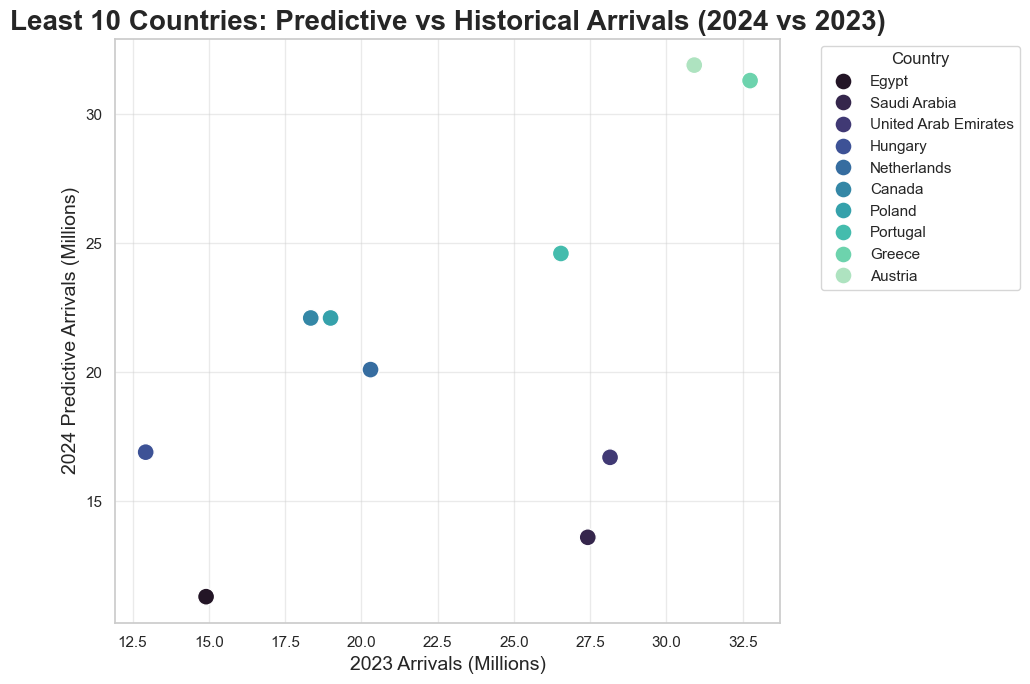

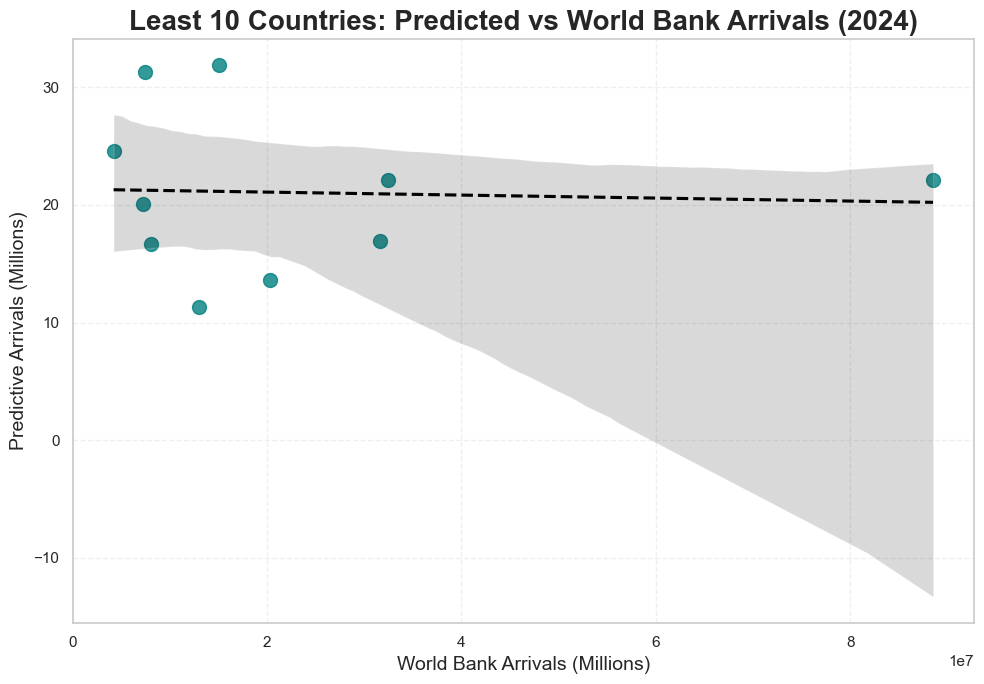

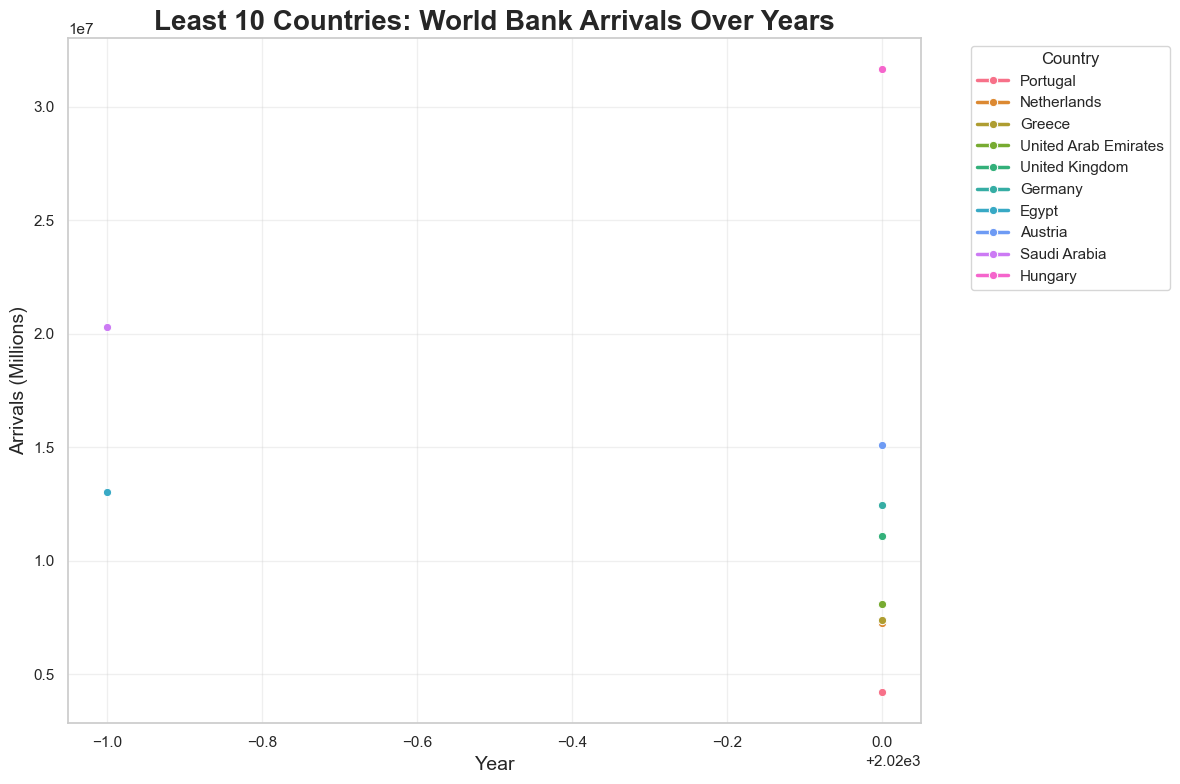

In [30]:
# Convert relevant columns to numeric, coercing errors to NaN
numerical_columns = [
    'MostVisited_NumOfArrivalsPredictive_Millions_2024',
    'MostVisited_NumOfArrivals_Millions_2023',
    'MostVisited_NumOfArrivals_Millions_2022',
    'MostVisited_NumOfArrivals_WorldBank'
]

for col in numerical_columns:
    mv[col] = pd.to_numeric(mv[col], errors='coerce')

# Drop rows with NaN values in the relevant columns
mv = mv.dropna(subset=numerical_columns)

# Set a theme
sns.set_theme(style="whitegrid", palette="muted")

# Function to get the least 10 countries
def least_10_countries(data, metric):
    return data.nsmallest(10, metric)

# Generate visualizations for least 10 countries
for col in numerical_columns:
    least10 = least_10_countries(mv, col)
    plt.figure(figsize=(14, 7))
    bar = sns.barplot(
        data=least10, 
        x=col, 
        y='country', 
        palette=sns.color_palette("Spectral", len(least10))
    )
    plt.title(f'Least 10 Countries by {col}', fontsize=20, fontweight='bold')
    plt.xlabel(f'{col} (Millions)', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    
    # Add value annotations
    for container in bar.containers:
        bar.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Predictive vs historical arrivals (2024 vs 2023) for least 10 predictive arrivals
least10_predictive = least_10_countries(mv, 'MostVisited_NumOfArrivalsPredictive_Millions_2024')
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=least10_predictive, 
    x='MostVisited_NumOfArrivals_Millions_2023', 
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024', 
    hue='country', 
    palette=sns.color_palette("mako", len(least10_predictive)), 
    s=150
)
plt.title('Least 10 Countries: Predictive vs Historical Arrivals (2024 vs 2023)', fontsize=20, fontweight='bold')
plt.xlabel('2023 Arrivals (Millions)', fontsize=14)
plt.ylabel('2024 Predictive Arrivals (Millions)', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Predictive vs World Bank data for least 10 predictive arrivals
plt.figure(figsize=(10, 7))
sns.regplot(
    data=least10_predictive, 
    x='MostVisited_NumOfArrivals_WorldBank', 
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024', 
    scatter_kws={'s': 100, 'color': 'teal'}, 
    line_kws={'color': 'black', 'linestyle': '--'}
)
plt.title('Least 10 Countries: Predicted vs World Bank Arrivals (2024)', fontsize=20, fontweight='bold')
plt.xlabel('World Bank Arrivals (Millions)', fontsize=14)
plt.ylabel('Predictive Arrivals (Millions)', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Historical trends over years for least 10 World Bank arrivals
least10_worldbank = least_10_countries(mv, 'MostVisited_NumOfArrivals_WorldBank')
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=least10_worldbank, 
    x='MostVisited_DataYear_WorldBank', 
    y='MostVisited_NumOfArrivals_WorldBank', 
    hue='country', 
    marker='o', 
    palette="husl", 
    linewidth=2.5
)
plt.title('Least 10 Countries: World Bank Arrivals Over Years', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Arrivals (Millions)', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_19516\530300859.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


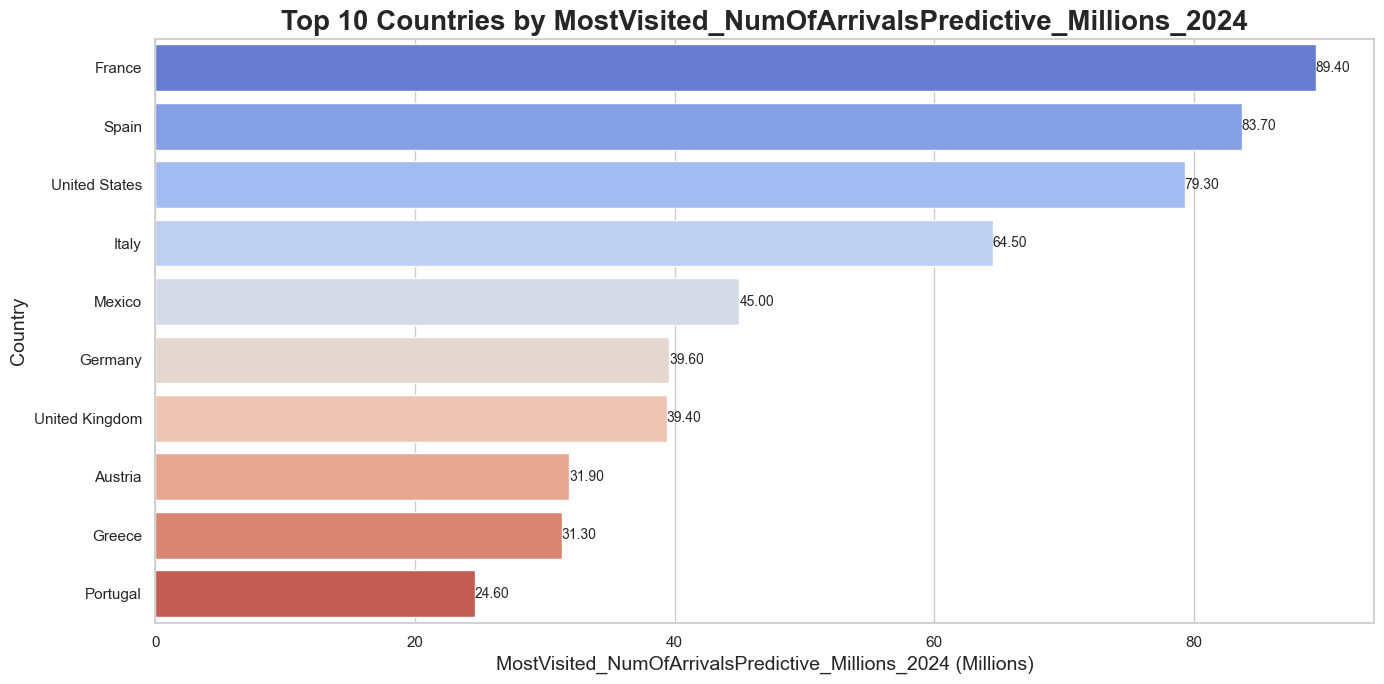

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\530300859.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


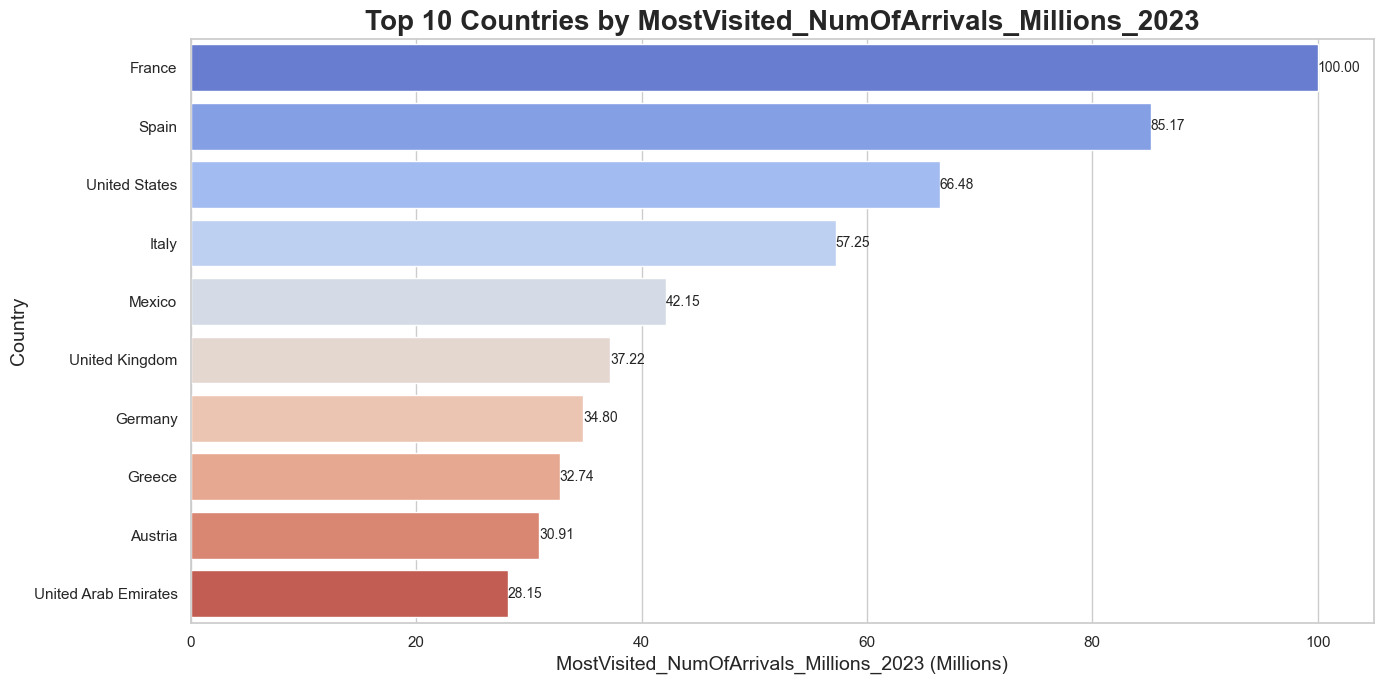

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\530300859.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


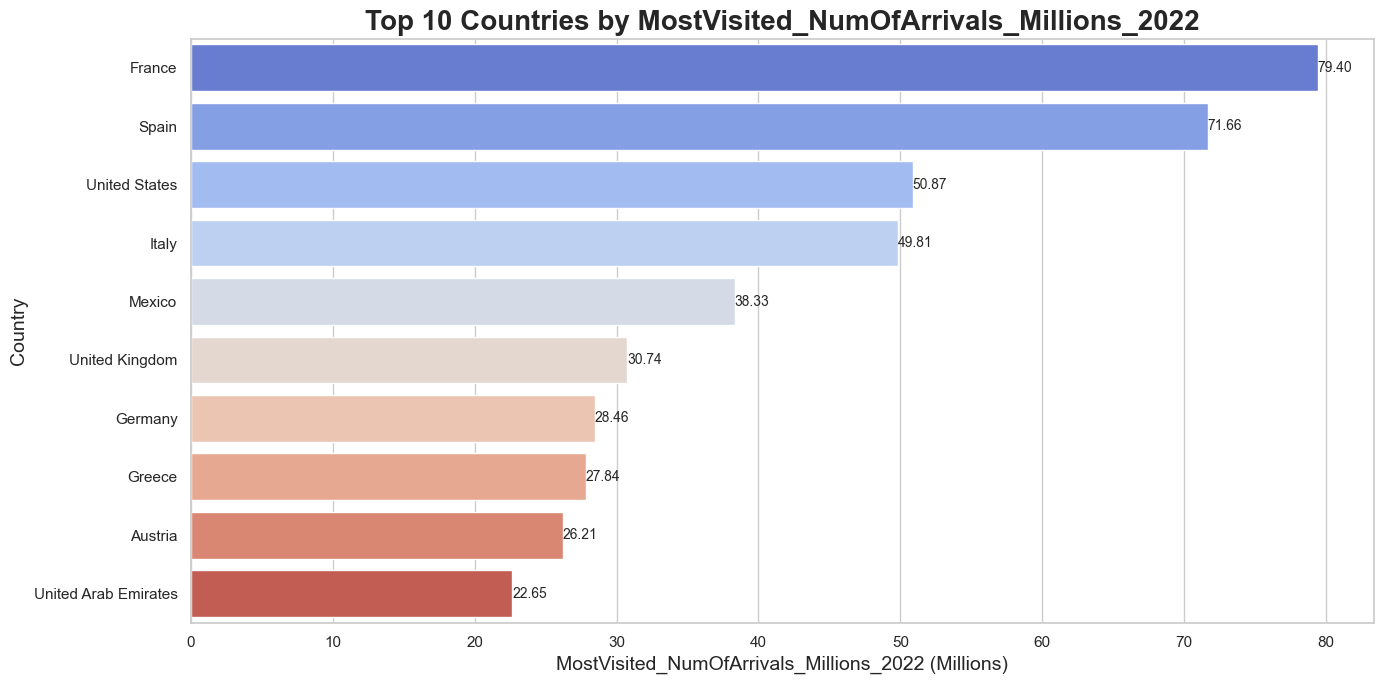

C:\Users\USER\AppData\Local\Temp\ipykernel_19516\530300859.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


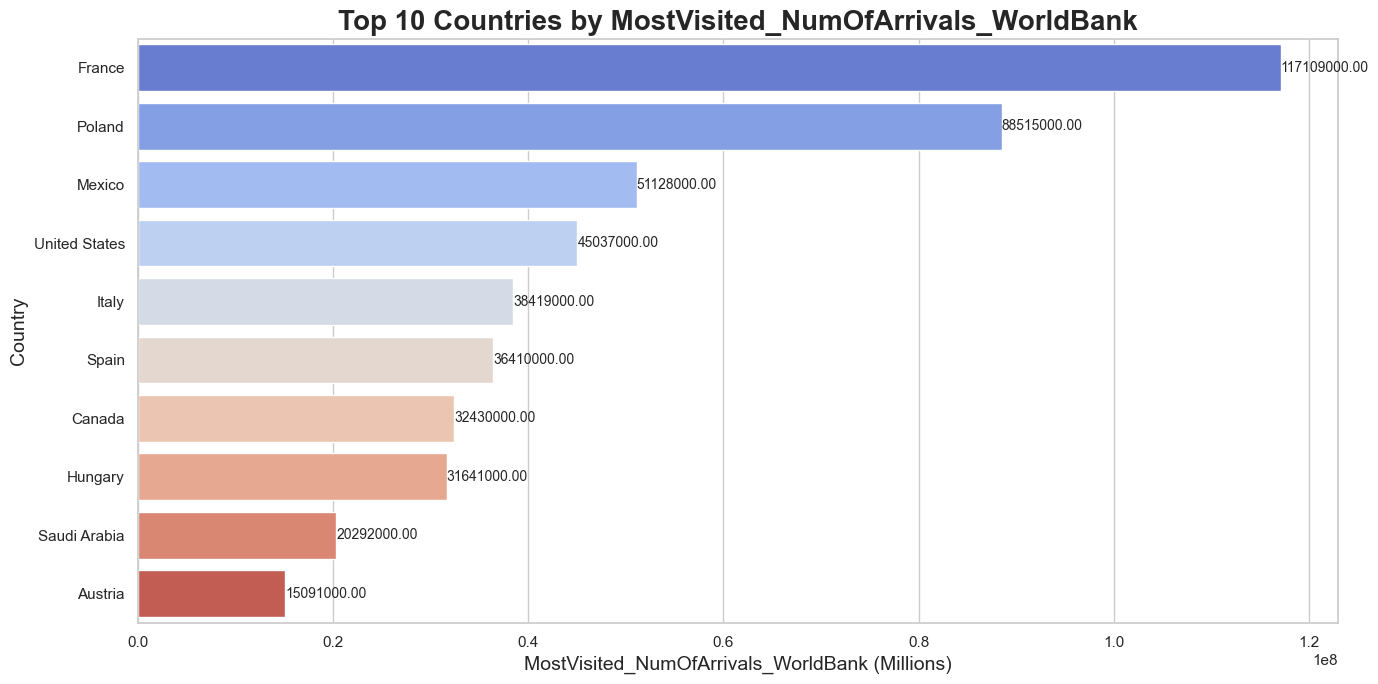

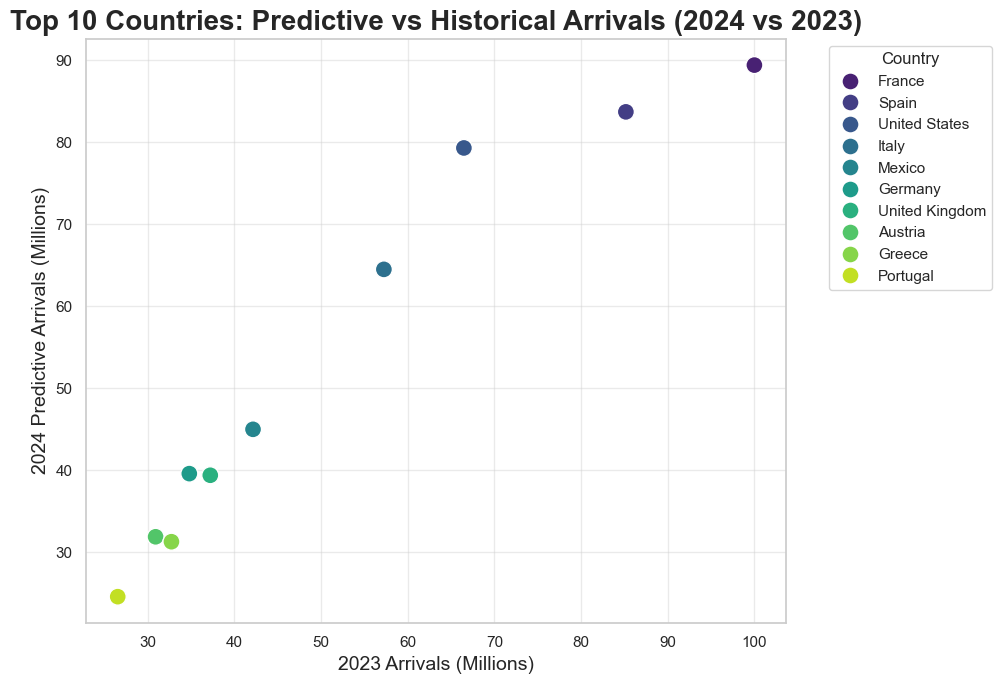

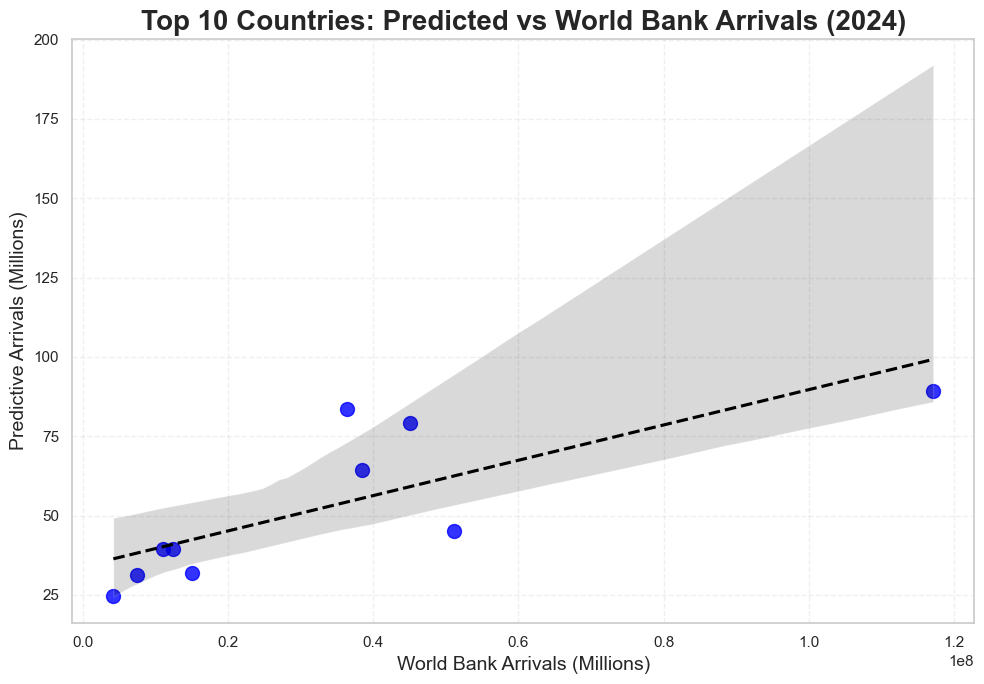

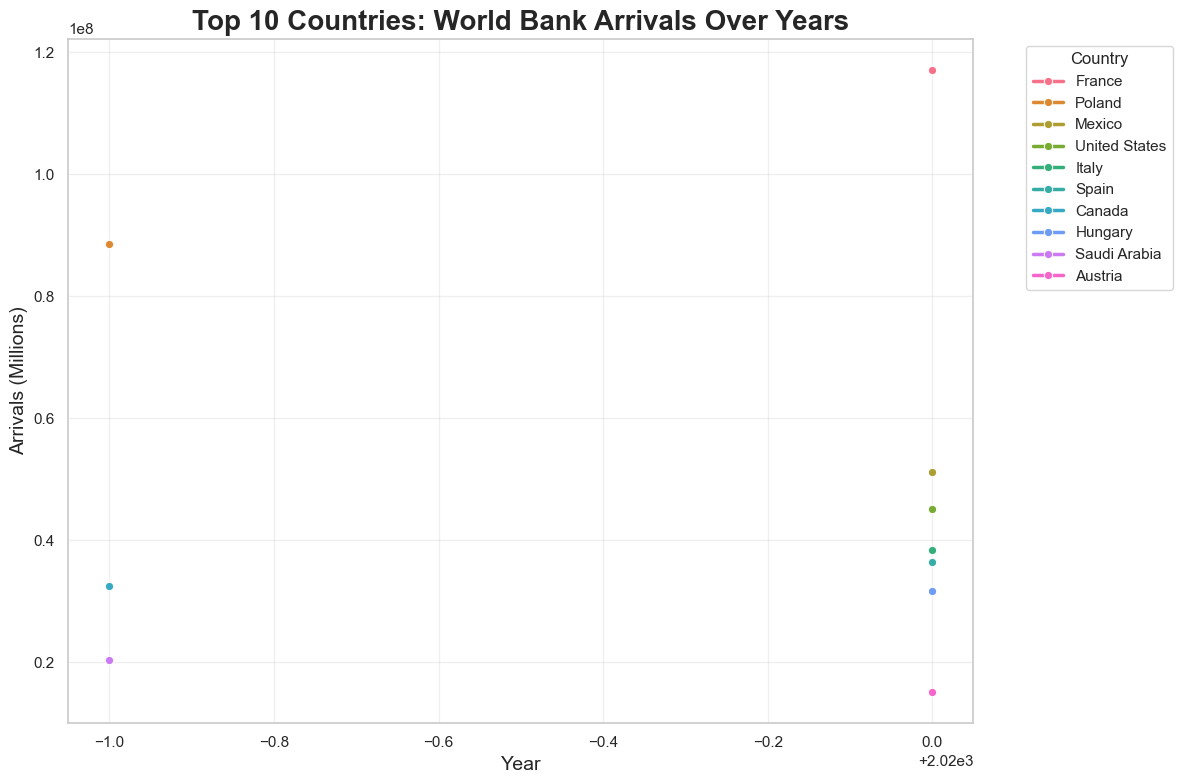

In [31]:
# Convert relevant columns to numeric, coercing errors to NaN
numerical_columns = [
    'MostVisited_NumOfArrivalsPredictive_Millions_2024',
    'MostVisited_NumOfArrivals_Millions_2023',
    'MostVisited_NumOfArrivals_Millions_2022',
    'MostVisited_NumOfArrivals_WorldBank'
]

for col in numerical_columns:
    mv[col] = pd.to_numeric(mv[col], errors='coerce')

# Drop rows with NaN values in the relevant columns
mv = mv.dropna(subset=numerical_columns)

# Set a theme
sns.set_theme(style="whitegrid", palette="muted")

# Function to get the top 10 countries
def top_10_countries(data, metric):
    return data.nlargest(10, metric)

# Generate visualizations for top 10 countries
for col in numerical_columns:
    top10 = top_10_countries(mv, col)
    plt.figure(figsize=(14, 7))
    bar = sns.barplot(
        data=top10, 
        x=col, 
        y='country', 
        palette=sns.color_palette("coolwarm", len(top10))
    )
    plt.title(f'Top 10 Countries by {col}', fontsize=20, fontweight='bold')
    plt.xlabel(f'{col} (Millions)', fontsize=14)
    plt.ylabel('Country', fontsize=14)
    
    # Add value annotations
    for container in bar.containers:
        bar.bar_label(container, fmt='%.2f', label_type='edge', fontsize=10)
    
    plt.tight_layout()
    plt.show()

# Predictive vs historical arrivals (2024 vs 2023) for top 10 predictive arrivals
top10_predictive = top_10_countries(mv, 'MostVisited_NumOfArrivalsPredictive_Millions_2024')
plt.figure(figsize=(10, 7))
sns.scatterplot(
    data=top10_predictive, 
    x='MostVisited_NumOfArrivals_Millions_2023', 
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024', 
    hue='country', 
    palette=sns.color_palette("viridis", len(top10_predictive)), 
    s=150
)
plt.title('Top 10 Countries: Predictive vs Historical Arrivals (2024 vs 2023)', fontsize=20, fontweight='bold')
plt.xlabel('2023 Arrivals (Millions)', fontsize=14)
plt.ylabel('2024 Predictive Arrivals (Millions)', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.4)
plt.tight_layout()
plt.show()

# Predictive vs World Bank data for top 10 predictive arrivals
plt.figure(figsize=(10, 7))
sns.regplot(
    data=top10_predictive, 
    x='MostVisited_NumOfArrivals_WorldBank', 
    y='MostVisited_NumOfArrivalsPredictive_Millions_2024', 
    scatter_kws={'s': 100, 'color': 'blue'}, 
    line_kws={'color': 'black', 'linestyle': '--'}
)
plt.title('Top 10 Countries: Predicted vs World Bank Arrivals (2024)', fontsize=20, fontweight='bold')
plt.xlabel('World Bank Arrivals (Millions)', fontsize=14)
plt.ylabel('Predictive Arrivals (Millions)', fontsize=14)
plt.grid(alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

# Historical trends over years for top 10 World Bank arrivals
top10_worldbank = top_10_countries(mv, 'MostVisited_NumOfArrivals_WorldBank')
plt.figure(figsize=(12, 8))
sns.lineplot(
    data=top10_worldbank, 
    x='MostVisited_DataYear_WorldBank', 
    y='MostVisited_NumOfArrivals_WorldBank', 
    hue='country', 
    marker='o', 
    palette="husl", 
    linewidth=2.5
)
plt.title('Top 10 Countries: World Bank Arrivals Over Years', fontsize=20, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Arrivals (Millions)', fontsize=14)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
